In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import json
import numpy as np   # use for mathematical problems
import pandas as pd # use to do task on data frame
import matplotlib.pyplot as plt # use to plot graph
from statsmodels.tsa.seasonal import seasonal_decompose  # use to find components of seasonal decompose
from statsmodels.tsa.stattools import adfuller  # use to check fata is stationary
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf  # USE TO GET P AND Q VALUE 
import  statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from  sklearn.metrics import mean_squared_error  # use to calculate error
from pmdarima.arima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:\channappa\capstone project\AmazonGroceryReview_csv.csv")

In [3]:
#df.to_csv("C:\channappa\capstone project\home.csv")

In [4]:
df=df.sort_values(by='Time',ascending=True)

In [5]:
df2=df.copy()

In [6]:
df2.shape

(1281555, 19)

In [7]:
df.isnull().sum()

Unnamed: 0.1          0
Unnamed: 0            0
productID             0
categories            0
price                 0
brand                 0
product_name          0
reviewerID            0
reviewerName          0
overall               0
review_text           0
pos_feedback          0
neg_feedback          0
rating_class          0
tokenized             0
Polarity              0
Sentiment             0
Sentiment_Analysis    0
Time                  0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,price,overall,pos_feedback,neg_feedback,Polarity,Sentiment
count,1.281555e+06,1.281555e+06,1.281555e+06,1.281555e+06,1.281555e+06,1.281555e+06,1.281555e+06,1.281555e+06
mean,6.438039e+05,6.438039e+05,2.339394e+01,4.253672e+00,1.484645e+00,4.175474e-01,3.043361e-01,9.255311e-01
std,3.718101e+05,3.718101e+05,1.638908e+01,1.254729e+00,4.680607e+01,2.683889e+00,2.497985e-01,3.127112e-01
min,0.000000e+00,0.000000e+00,1.000000e-02,1.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00
25%,3.218705e+05,3.218705e+05,1.358000e+01,4.000000e+00,0.000000e+00,0.000000e+00,1.562500e-01,1.000000e+00
50%,6.431970e+05,6.431970e+05,2.397000e+01,5.000000e+00,0.000000e+00,0.000000e+00,3.069444e-01,1.000000e+00
75%,9.658585e+05,9.658585e+05,2.721000e+01,5.000000e+00,1.000000e+00,0.000000e+00,4.666667e-01,1.000000e+00
max,1.287840e+06,1.287840e+06,9.999900e+02,5.000000e+00,4.095000e+04,8.300000e+02,1.000000e+00,2.000000e+00


In [9]:
df.dtypes

Unnamed: 0.1            int64
Unnamed: 0              int64
productID              object
categories             object
price                 float64
brand                  object
product_name           object
reviewerID             object
reviewerName           object
overall                 int64
review_text            object
pos_feedback            int64
neg_feedback            int64
rating_class           object
tokenized              object
Polarity              float64
Sentiment               int64
Sentiment_Analysis     object
Time                   object
dtype: object

In [10]:
mask = (df['Time'] > '2010-1-1') & (df['Time'] <= '2014-12-31')
df = df.loc[mask]

In [11]:
df2

,Unnamed: 0.1,Unnamed: 0,productID,categories,price,brand,product_name,reviewerID,reviewerName,overall,review_text,pos_feedback,neg_feedback,rating_class,tokenized,Polarity,Sentiment,Sentiment_Analysis,Time
522,522,522,B00004S1C5,grocery gourmet food cooking baking food col...,9.760000,HIC Harold Import Co.,ateco food coloring kit colors,A1KXONFPU2XQ5K,stephanie manley,5,very easy to use this are so much easier to us...,9,1,good,"['easy', 'use', 'much', 'easier', 'use', 'wils...",0.054167,1,Positive,2000-08-09T00:00:00.000Z
498,498,498,B00004S1C5,grocery gourmet food cooking baking food col...,9.760000,HIC Harold Import Co.,ateco food coloring kit colors,A7P76IGRZZBFJ,e thompson soooooper genius,5,who needs wilton im sick of scads of nasty too...,28,1,good,"['needs', 'wilton', 'im', 'sick', 'scads', 'na...",0.048677,1,Positive,2000-12-05T00:00:00.000Z
535,535,535,B00004TBB0,grocery gourmet food,5.900000,Celestial Seasonings,bengal spice tea bag,A3BM25E8W5AOJY,budman budnsarah,4,different the amor belhom duo are likely the o...,0,0,good,"['different', 'amor', 'belhom', 'duo', 'likely...",0.298077,1,Positive,2000-12-05T00:00:00.000Z
889,889,889,B00005AS53,grocery gourmet food beverages coffee ground ...,24.079781,Vacu,vin coffee saver refill container,A3EJYOW6K0X0A4,leonard simon mlens,5,an absolute must to store your fresh coffee be...,22,1,good,"['absolute', 'must', 'store', 'fresh', 'coffee...",0.308333,1,Positive,2001-07-05T00:00:00.000Z
567,567,567,B000052YEH,grocery gourmet food,83.590000,Vaseline,unilever bestfoods cherry skin protectant,A2RU1DH51TJ5DN,edwin chua airecu,3,ok but not medicated ive used this product and...,0,0,good,"['ok', 'medicated', 'ive', 'used', 'product', ...",0.500000,1,Positive,2002-01-07T00:00:00.000Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279421,1285694,1285694,B00JGTBTXS,grocery gourmet food,17.990000,Edible,sugar diamonds cake decoration wedding,A24NQ2L29KGBK5,elana d clarke,5,five stars received in great time and really a...,0,0,good,"['five', 'stars', 'received', 'great', 'time',...",0.333333,1,Positive,2014-07-23T00:00:00.000Z
1271086,1277311,1277311,B00HQT5904,grocery gourmet food,23.160000,Modern,oats mango blackberry oatmeal ounce,A1UXTWTMUDWHQT,c peter wallace,4,four stars ah may zing i do eat this daily,0,0,good,"['four', 'stars', 'ah', 'may', 'zing', 'eat', ...",0.000000,2,Neutral,2014-07-23T00:00:00.000Z
1226017,1232071,1232071,B00DS842HS,grocery gourmet food,14.790000,Viva Labs,organic extra virgin coconut oil,AL3F9G2ED4LBV,andres garcia,3,not use to it yet the only reason i give this ...,0,0,good,"['use', 'yet', 'reason', 'give', 'stars', 'im'...",0.200000,1,Positive,2014-07-23T00:00:00.000Z
1278993,1285266,1285266,B00JAXNMRG,grocery gourmet food,6.800000,Wonka,randoms gummy stand up bag,A37D2TGTIXRV2N,plyopowerd arrow dynamic mom,5,after one taste i ordered a whole box thats ho...,0,0,good,"['one', 'taste', 'ordered', 'whole', 'box', 't...",0.285000,1,Positive,2014-07-23T00:00:00.000Z


## resampling tge data

In [12]:
# Convert time object to datetime and create a new column named 'time'
df['Time'] = pd.to_datetime(df['Time'])

df.set_index('Time',inplace=True)

In [13]:
month=df.resample('w').mean()

In [14]:
month.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
price           0
overall         0
pos_feedback    0
neg_feedback    0
Polarity        0
Sentiment       0
dtype: int64

In [15]:
month.shape

(200, 8)

In [16]:
month.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
price           0
overall         0
pos_feedback    0
neg_feedback    0
Polarity        0
Sentiment       0
dtype: int64

In [17]:
df.shape

(1122983, 18)

## calculate time series components

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [19]:
decompose=seasonal_decompose(month['Sentiment'],period=52)
trend=decompose.trend
seasonal=decompose.seasonal
resid=decompose.resid

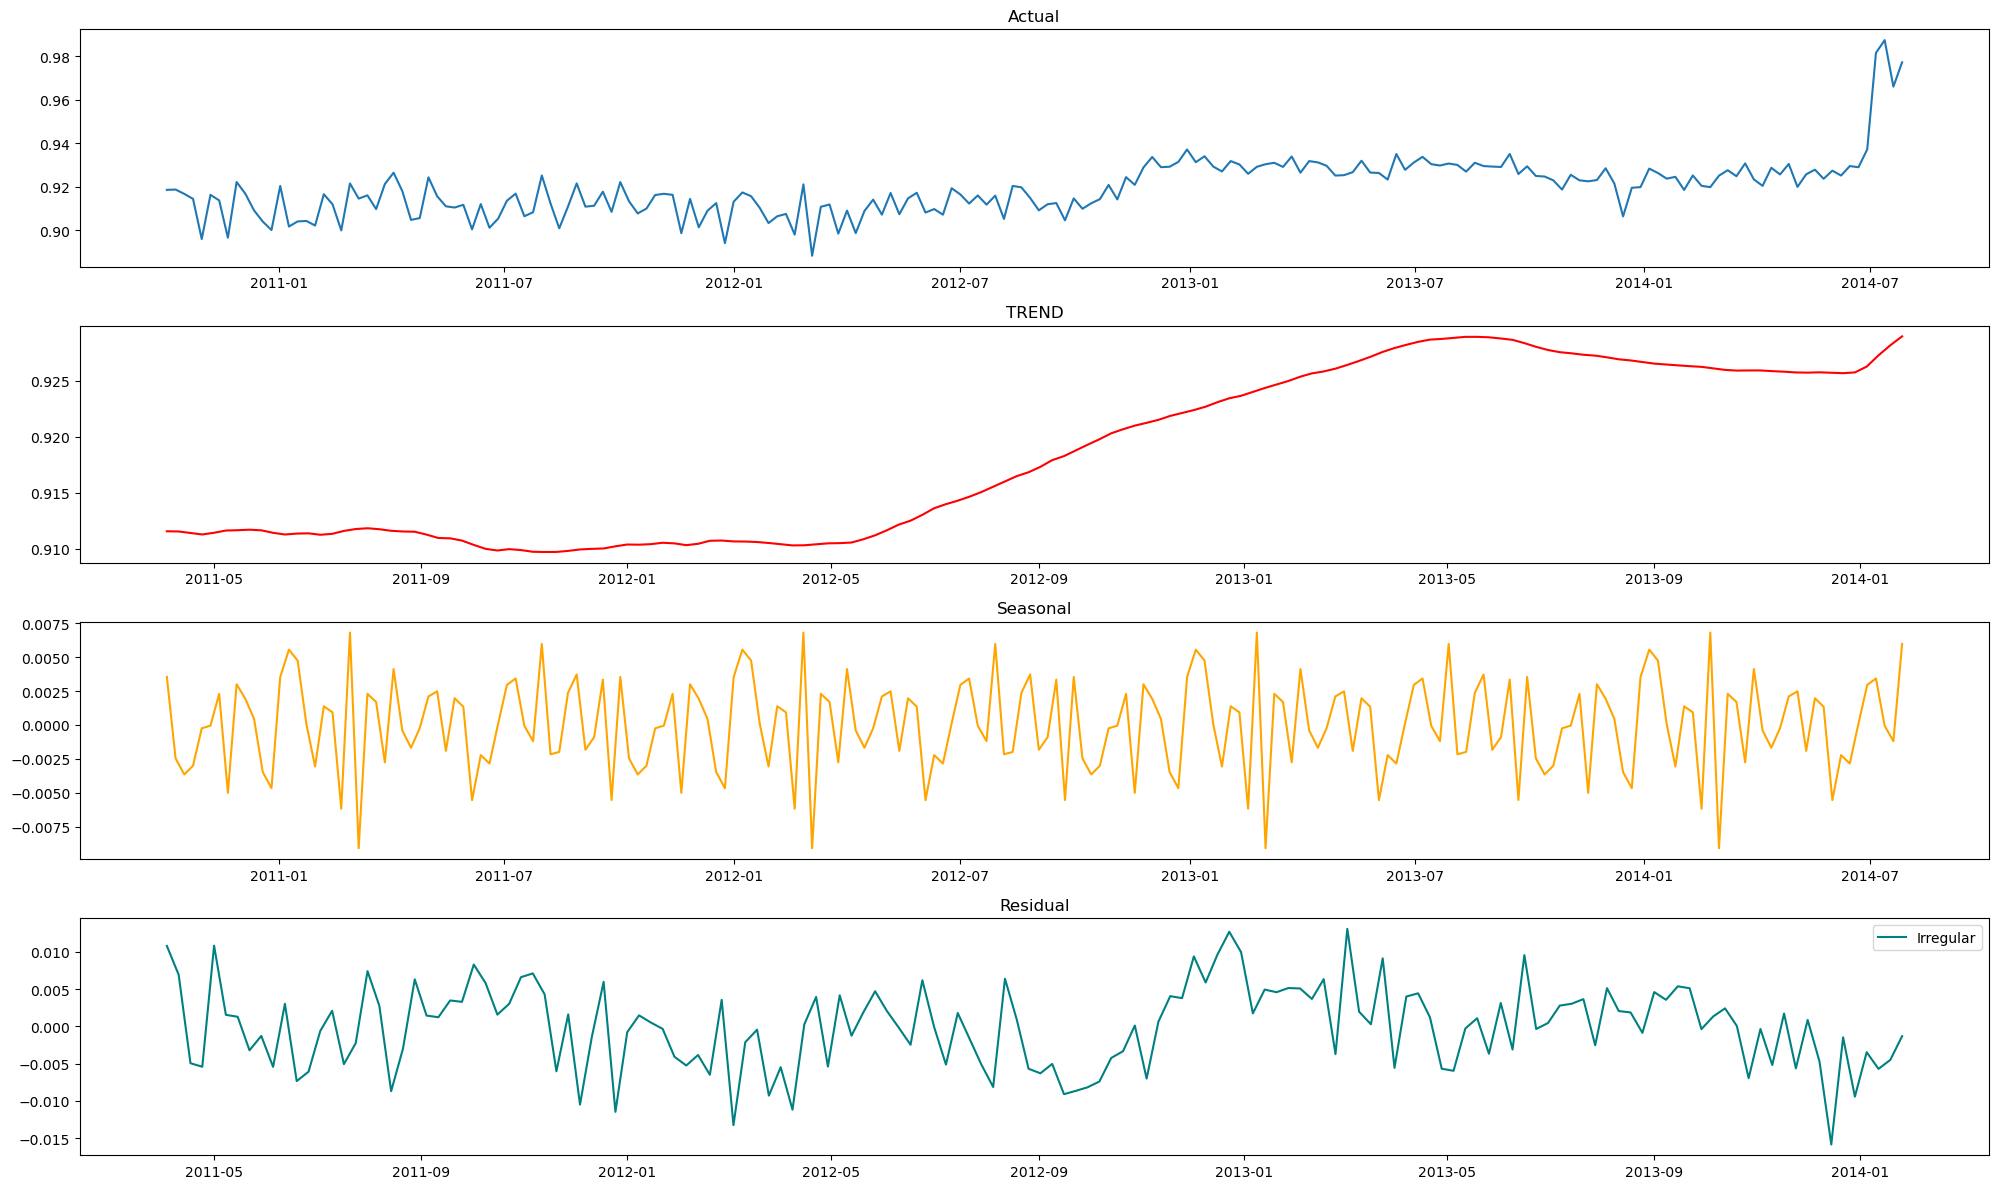

In [20]:
plt.figure(figsize=(20,12))
plt.subplot(4,1,1)
plt.plot(month['Sentiment'],label='original')
plt.title('Actual')
plt.subplot(4,1,2)
plt.plot(trend,label='Trend',color='r')
plt.title('TREND')
plt.subplot(4,1,3)
plt.plot(seasonal,label='Seasonality',color='orange')
plt.title('Seasonal')
plt.subplot(4,1,4)
plt.plot(resid,label='Irregular',color='teal')
plt.title('Residual')
plt.legend()
plt.tight_layout()
plt.show()

In [21]:
from statsmodels.tsa.stattools import  adfuller 

In [22]:
## check data stationary
def sta(data):
    pvalue=adfuller(data)[1]
    
    if pvalue <0.05:
        ret='data is astationary'
    else:
        ret='data is not stationary'
    return ret

In [23]:
price=month['Sentiment']
price

Time
2010-10-03 00:00:00+00:00    0.918580
2010-10-10 00:00:00+00:00    0.918731
2010-10-17 00:00:00+00:00    0.916726
2010-10-24 00:00:00+00:00    0.914446
2010-10-31 00:00:00+00:00    0.896000
                               ...   
2014-06-29 00:00:00+00:00    0.937168
2014-07-06 00:00:00+00:00    0.981474
2014-07-13 00:00:00+00:00    0.987346
2014-07-20 00:00:00+00:00    0.965969
2014-07-27 00:00:00+00:00    0.977162
Freq: W-SUN, Name: Sentiment, Length: 200, dtype: float64

In [24]:
sta(price)

'data is not stationary'

In [25]:
diff=price-price.shift(1)
diff.dropna(inplace=True)

In [26]:
sta(diff)


'data is not stationary'

In [27]:
len(price)

200

In [28]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

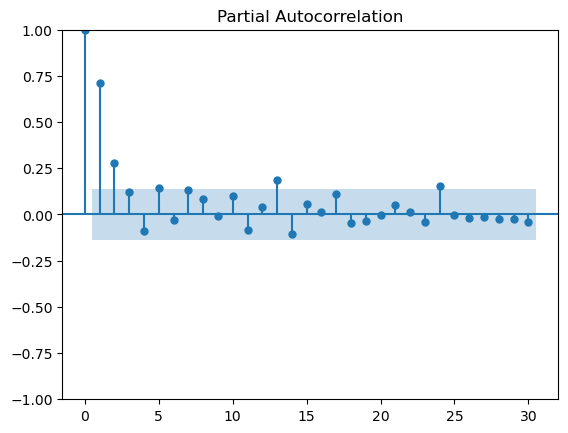

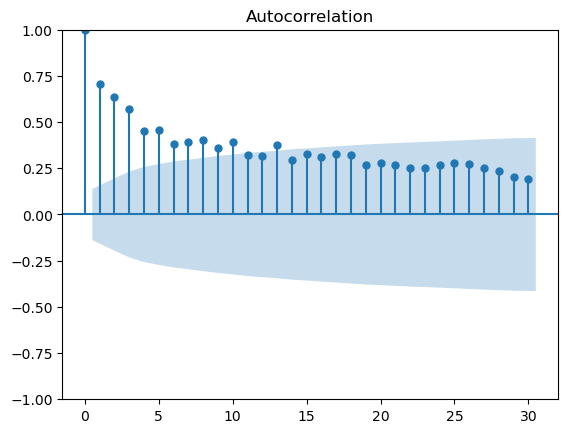

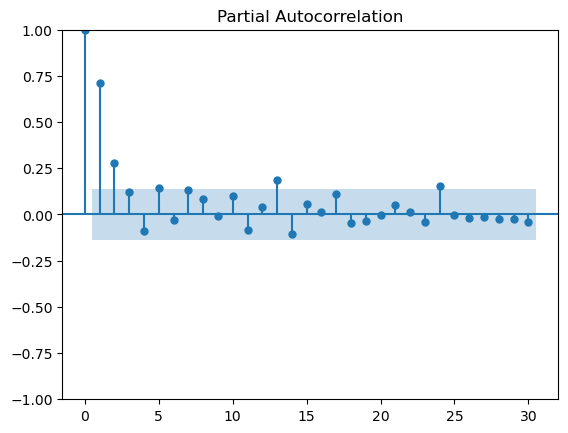

In [29]:
plot_acf(month.Sentiment,lags=30)
plot_pacf(month.Sentiment,lags=30)

q=11
p=5

In [30]:
l=int(0.7*len(month.Sentiment))
train=month.Sentiment.iloc[:l]
test=month.Sentiment.iloc[l:]
print(train.shape,test.shape)

(140,) (60,)


In [31]:
from sklearn.metrics import mean_squared_error

## Build a ARIMA model, build a function for checking the best model

In [32]:
from pmdarima import auto_arima

In [33]:
def arima_model(data):
    
    list1 = []
    for p in range(5):
        
        for q in range(13):
            list1.append((p,1,q))
           
    model = []
    for i in list1:
        
        m=ARIMA(train,order=i).fit()
        model.append(m)
       
    forecast = []
    for v in model:
        
        f=v.predict(0,len(test)-1)
        forecast.append(f)
       
    RMSE=[]
    for a in forecast[0:]:
        
        rmse = mean_squared_error(test,a,squared=False)
        RMSE.append(round(rmse,3))
    df1=pd.DataFrame()
    df1['list']=list1
    df1['model']=model
    df1['forecast']=forecast
    df1['rmse']=RMSE
   
       
    return(df1)

In [34]:
dff=arima_model(train) 

In [35]:
dff[dff.rmse==dff.rmse.min()] 

,list,model,forecast,rmse
0,"(0, 1, 0)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
1,"(0, 1, 1)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
2,"(0, 1, 2)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
3,"(0, 1, 3)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
4,"(0, 1, 4)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
...,...,...,...,...
60,"(4, 1, 8)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
61,"(4, 1, 9)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
62,"(4, 1, 10)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121
63,"(4, 1, 11)",<statsmodels.tsa.arima.model.ARIMAResultsWrapp...,Time 2010-10-03 00:00:00+00:00 0.000000 201...,0.121


In [36]:
from pmdarima import auto_arima

In [37]:
m1 = auto_arima(month['Sentiment'],start_p=0,max_p=5, start_q=0,max_q=12, seasonal=True, trace=True)
print(m1.summary())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1297.661, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1333.650, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1353.434, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1299.457, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1351.124, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-1351.535, Time=0.28 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-1349.501, Time=0.45 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-1354.139, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=-1351.901, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=-1351.144, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=-1335.208, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=-1350.188, Time=0.28 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.785 seconds
                               SARIMAX Results                              

In [38]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [39]:
model=SARIMAX(train,order=(0,1,1),seasonal_order=(0,1,1,52)).fit()

In [40]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sentiment   No. Observations:                  140
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 52)   Log Likelihood                 282.864
Date:                            Tue, 13 Dec 2022   AIC                           -559.728
Time:                                    13:18:01   BIC                           -552.330
Sample:                                10-03-2010   HQIC                          -556.749
                                     - 06-02-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.6909      0.087     -7.898      0.000      -0.862      -0.519
ma.S.L52      -0.6564      0.433   

In [41]:
sarima_predict=model.predict(len(train),len(train)+len(test)-1)
sarima_forecast=model.predict(len(month),len(month)+104)

In [42]:
month['Sentiment']

Time
2010-10-03 00:00:00+00:00    0.918580
2010-10-10 00:00:00+00:00    0.918731
2010-10-17 00:00:00+00:00    0.916726
2010-10-24 00:00:00+00:00    0.914446
2010-10-31 00:00:00+00:00    0.896000
                               ...   
2014-06-29 00:00:00+00:00    0.937168
2014-07-06 00:00:00+00:00    0.981474
2014-07-13 00:00:00+00:00    0.987346
2014-07-20 00:00:00+00:00    0.965969
2014-07-27 00:00:00+00:00    0.977162
Freq: W-SUN, Name: Sentiment, Length: 200, dtype: float64

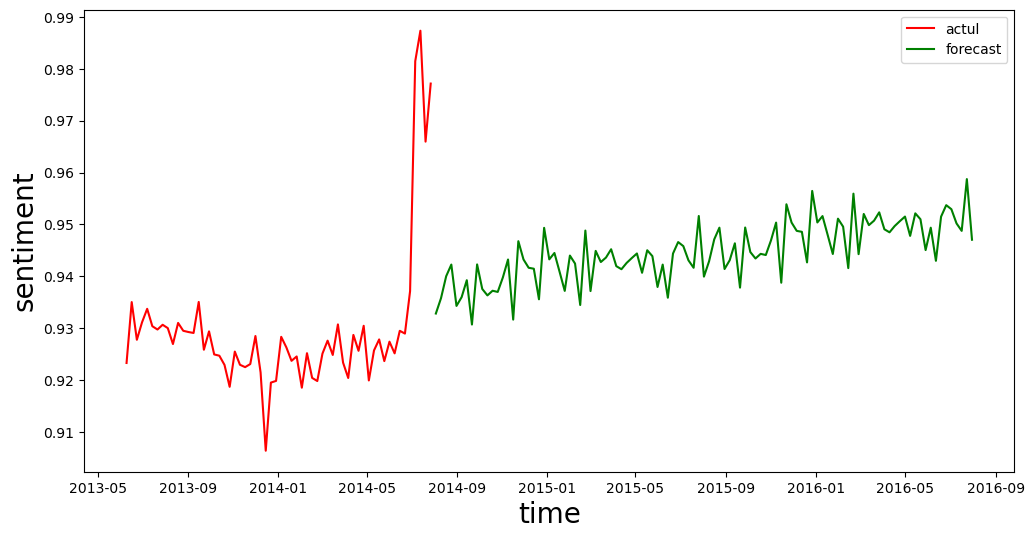

In [43]:
plt.figure(figsize=(12,6))
plt.plot(test,color='r',label='actul')
plt.plot(sarima_forecast,color='g',label='forecast')
plt.ylabel('sentiment',fontsize=(20))
plt.xlabel('time',fontsize=(20))

plt.legend()
plt.show()